**Máster Universitario VIU:** Big Data y Ciencia de Datos

**Proyecto Final:** Visualización de Datos

**Estudiante:** Eleanor Varela Tapia

# **Resumen**

El proyecto trata sobre Clientes con tarjeta de crédito.

Los datos son del repositorio Kaggle:

https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?resource=download


En el portal Kaggle, espresa que los directivos de un banco están preocupados porque cada vez más clientes abandonan sus servicios de tarjeta de crédito.

Por lo que se requiere de hacer la predicción sobre  quién va a abandonar el servicio para poder dirigirse proactivamente al cliente y poder ofrecerle mejores servicios y cambiar las decisiones de los clientes en la dirección contraria.

Por otro lado, menciona que los datos han sido obtenidos del sitio web cuya URL es https://leaps.analyttica.com/home.

El dataset consta de 10.127 clientes que mencionan su edad, salario, estado civil, límite de la tarjeta de crédito, categoría de la tarjeta de crédito, etc. Hay aproximadamente casi 18 características.

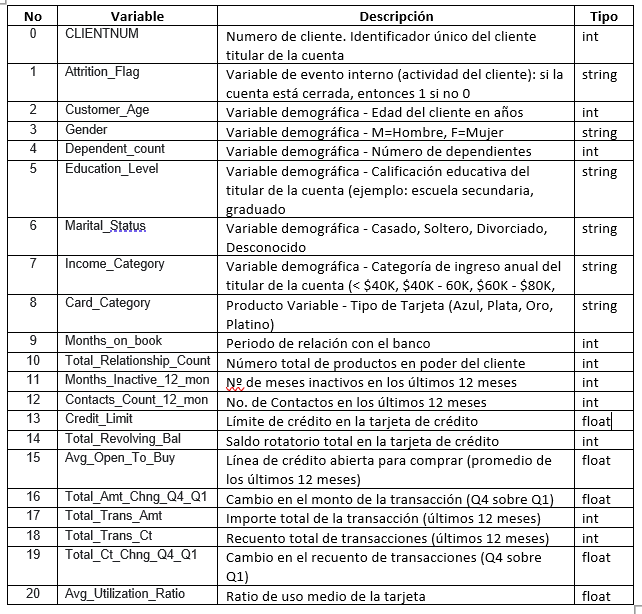

# **Librerías**

In [ ]:
#importación de librerías
import pandas as pd #Manejo de vectores, dataframes
import numpy as np #Manejo de estadística descriptiva
from numpy import corrcoef, transpose, arange
import matplotlib.pyplot as plt #Manejo de gráficos
import seaborn as sns

# **Cargar datos**

In [ ]:
# Cargando el drive de gmail
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Es el drive personal de la cuenta gmail
df_bank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VIU_ModuloVisualizacionDatos/BankChurners.csv',delimiter=',')

# **Explorar datos**

In [ ]:
# Información del dataset
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
# Eliminación de las variables que no son de los datos, con la función drop
df_bank2 = df_bank.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])
# Ahora para trabajar con las variable borradas se debe usar df_bank2

In [ ]:
# Información actualizada del dataset
df_bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [ ]:
# Visualizando de df_bank2
df_bank2

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
# Para ver por columnas
df_bank_t = transpose(df_bank2)
df_bank_t

,0,1,2,3,4,5,6,7,8,9,...,10117,10118,10119,10120,10121,10122,10123,10124,10125,10126
CLIENTNUM,768805383,818770008,713982108,769911858,709106358,713061558,810347208,818906208,710930508,719661558,...,712503408,713755458,716893683,710841183,713899383,772366833,710638233,716506083,717406983,714337233
Attrition_Flag,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer,...,Existing Customer,Attrited Customer,Attrited Customer,Existing Customer,Existing Customer,Existing Customer,Attrited Customer,Attrited Customer,Attrited Customer,Attrited Customer
Customer_Age,45,49,51,40,40,44,51,32,37,48,...,57,50,55,54,56,50,41,44,30,43
Gender,M,F,M,F,M,M,M,M,M,M,...,M,M,F,M,F,M,M,F,M,F
Dependent_count,3,5,3,4,3,2,4,0,3,2,...,2,1,3,1,1,2,2,1,2,2
Education_Level,High School,Graduate,Graduate,High School,Uneducated,Graduate,Unknown,High School,Uneducated,Graduate,...,Graduate,Unknown,Uneducated,High School,Graduate,Graduate,Unknown,High School,Graduate,Graduate
Marital_Status,Married,Single,Married,Unknown,Married,Married,Married,Unknown,Single,Single,...,Married,Unknown,Single,Single,Single,Single,Divorced,Married,Unknown,Married
Income_Category,$60K - $80K,Less than $40K,$80K - $120K,Less than $40K,$60K - $80K,$40K - $60K,$120K +,$60K - $80K,$60K - $80K,$80K - $120K,...,$80K - $120K,$80K - $120K,Unknown,$60K - $80K,Less than $40K,$40K - $60K,$40K - $60K,Less than $40K,$40K - $60K,Less than $40K
Card_Category,Blue,Blue,Blue,Blue,Blue,Blue,Gold,Silver,Blue,Blue,...,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Blue,Silver
Months_on_book,39,44,36,34,21,36,46,27,36,36,...,40,36,47,34,50,40,25,36,36,25


In [ ]:
# Dimensiones
df_bank2.shape

(10127, 21)

# **Procesar datos**

In [ ]:
# Se visualiza una lista con % de datos faltantes
for col in df_bank2.columns:
    pct_missing = np.mean(df_bank2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

CLIENTNUM - 0.0%
Attrition_Flag - 0.0%
Customer_Age - 0.0%
Gender - 0.0%
Dependent_count - 0.0%
Education_Level - 0.0%
Marital_Status - 0.0%
Income_Category - 0.0%
Card_Category - 0.0%
Months_on_book - 0.0%
Total_Relationship_Count - 0.0%
Months_Inactive_12_mon - 0.0%
Contacts_Count_12_mon - 0.0%
Credit_Limit - 0.0%
Total_Revolving_Bal - 0.0%
Avg_Open_To_Buy - 0.0%
Total_Amt_Chng_Q4_Q1 - 0.0%
Total_Trans_Amt - 0.0%
Total_Trans_Ct - 0.0%
Total_Ct_Chng_Q4_Q1 - 0.0%
Avg_Utilization_Ratio - 0.0%


# **Visualizar datos**

Gráfico de  anillos para identificación de la composición de clientes vinculados y los clientes desvinculados del servicio de la tarjeta de crédito de acuerdo a la variable Attrition_Flag.


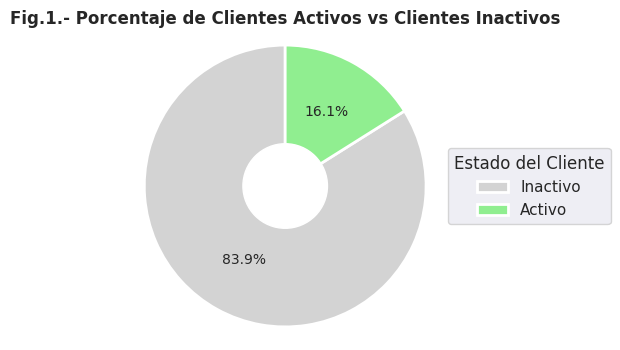

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Contando la frecuencia de cada clase
counts = df_bank2['Attrition_Flag'].value_counts()

# Creando el gráfico de anillo exterior
fig, ax = plt.subplots(figsize=(4, 4))

wedges, text_labels, autotexts = ax.pie(counts.values, startangle=90,
                                        colors=['lightgray', 'lightgreen'], autopct='%1.1f%%',
                                        wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

# Ajustando las etiquetas y texto en cada sección
plt.setp(text_labels, size=12, weight='bold')
plt.setp(autotexts, size=10)

# Agregando un círculo interior para crear el efecto de donna
circle = plt.Circle((0, 0), 0.3, color='white')

ax.add_artist(circle)

# Agregando leyenda en la parte derecha
legend_labels = ['Inactivo', 'Activo']
plt.legend(wedges, legend_labels, title='Estado del Cliente', loc='center left', bbox_to_anchor=(1, 0.5))

# Agregando título en negrita
plt.title('Fig.1.- Porcentaje de Clientes Activos vs Clientes Inactivos', weight='bold')

plt.axis('equal')  # Asegurando que el gráfico de anillo sea circular
plt.show()

Gráfico de columnas agrupadas para comparar la cantidad por estado de cliente por género.

Variables: Attrition_Flag y Gender.

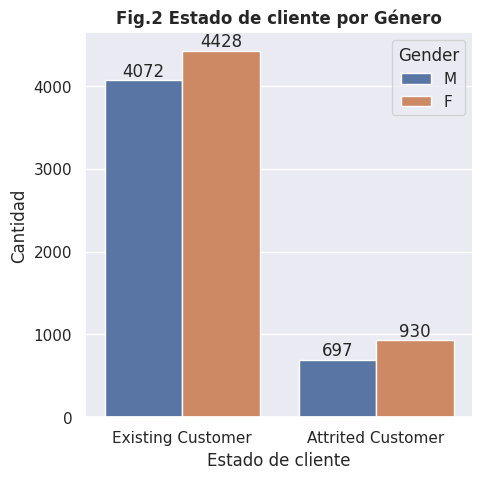

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creando el gráfico de columnas múltiples
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=df_bank2, x='Attrition_Flag', hue='Gender')

# Agregando las etiquetas de cantidad encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Títulos
plt.title('Fig.2 Estado de cliente por Género', weight='bold')
plt.xlabel('Estado de cliente')
plt.ylabel('Cantidad')

plt.show()


Gráfico de barras agrupadas para comparar la cantidad de clientes por estado civil y género.

Variables: Marital-Status y Gender.

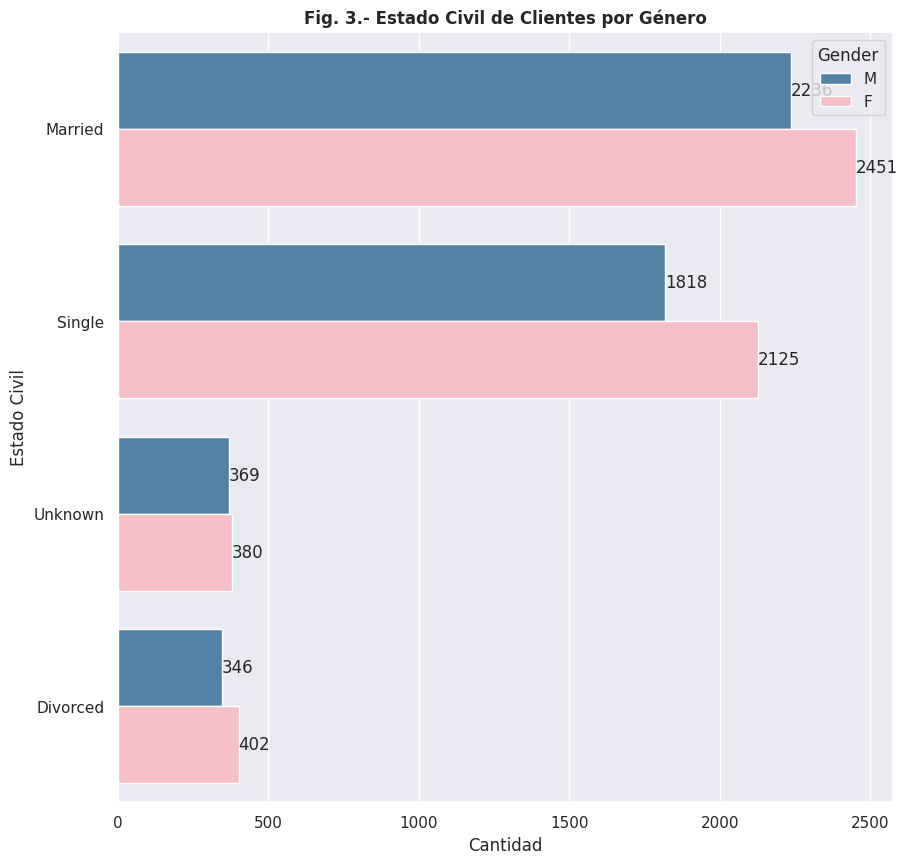

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creando el diagrama de barras horizontales
ax = sns.countplot(y=df_bank2['Marital_Status'], hue='Gender', data=df_bank2, palette={'M': 'steelblue', 'F': 'lightpink'})
for i in ax.containers:
    ax.bar_label(i)

sns.set(rc={'figure.figsize': (4.4, 2.8)})  # Cambiar el tamaño a un 70% del original

# Agregando los labels y el título
plt.xlabel('Cantidad')
plt.ylabel('Estado Civil')

# Agregando título en negrita
plt.title('Fig. 3.- Estado Civil de Clientes por Género', weight='bold')

plt.show()


Gráfico circular para análisis de la composición de los clientes por estado civil y estado del cliente .

Variables: Marital_Status, Attrition_Flag.

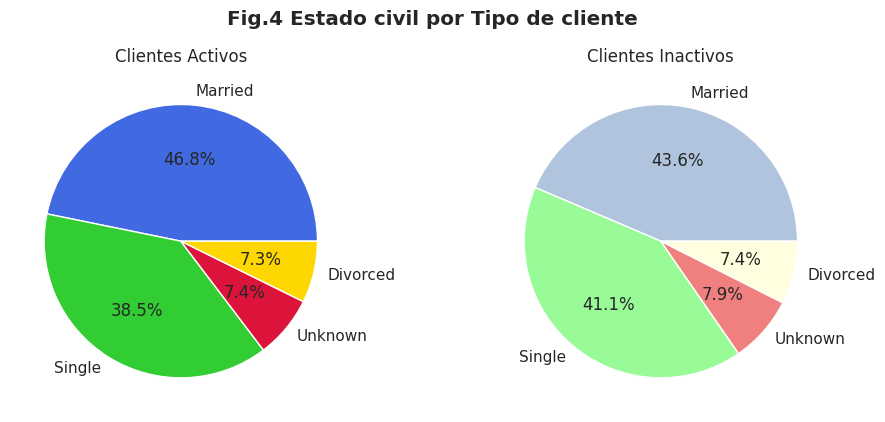

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asignación de colores a cada tipo de Marital_Status
active_colors = {'Married': 'royalblue', 'Single': 'limegreen', 'Divorced': 'crimson', 'Unknown': 'gold'}
inactive_colors = {'Married': 'lightsteelblue', 'Single': 'palegreen', 'Divorced': 'lightcoral', 'Unknown': 'lightyellow'}

# Creando subpaneles
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico para clientes activos
ax1 = plt.subplot(1, 2, 1)
df_active_customers = df_bank2[df_bank2['Attrition_Flag'] == 'Existing Customer']
ax1.pie(df_active_customers['Marital_Status'].value_counts(), labels=df_active_customers['Marital_Status'].unique(), autopct='%1.1f%%', colors=active_colors.values())
ax1.set_title('Clientes Activos')

# Gráfico para clientes inactivos
ax2 = plt.subplot(1, 2, 2)
df_inactive_customers = df_bank2[df_bank2['Attrition_Flag'] == 'Attrited Customer']
ax2.pie(df_inactive_customers['Marital_Status'].value_counts(), labels=df_inactive_customers['Marital_Status'].unique(), autopct='%1.1f%%', colors=inactive_colors.values())
ax2.set_title('Clientes Inactivos')

# Ajustando espacio entre los subpaneles
plt.tight_layout()

plt.suptitle('Fig.4 Estado civil por Tipo de cliente', y=1.05, fontweight='bold')

# Mostrando los gráficos
plt.show()


Gráfico de columnas para identificar la cantidad de dependientes por tipo de cliente.

Variables: Attrition_Flag, Dependent_count

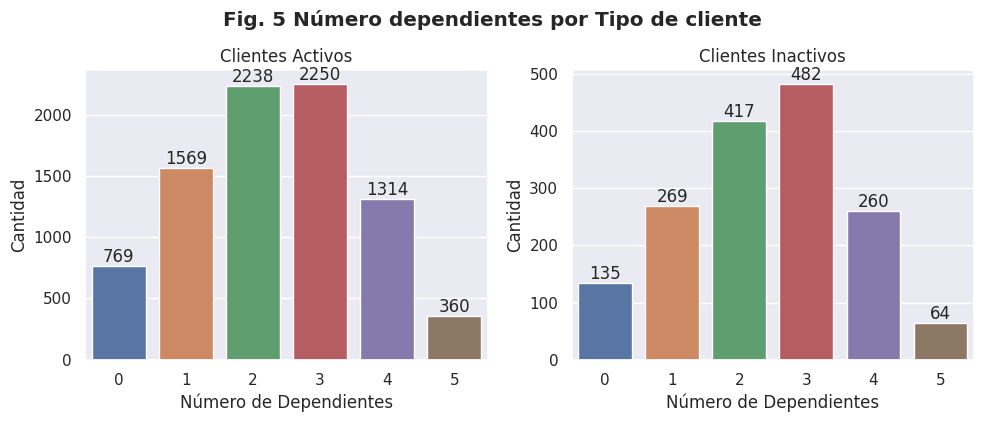

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrando clientes activos e inactivos
df_active_customers = df_bank2[df_bank2['Attrition_Flag'] == 'Existing Customer']
df_inactive_customers = df_bank2[df_bank2['Attrition_Flag'] == 'Attrited Customer']

# Creando subpaneles
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico para clientes activos
ax1 = sns.countplot(x='Dependent_count', data=df_active_customers, ax=axes[0])
ax1.set_xlabel('Número de Dependientes')
ax1.set_ylabel('Cantidad')
ax1.set_title('Clientes Activos')

# Agregando etiquetas de cantidad en la parte superior de cada barra en el gráfico de clientes activos
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Gráfico para clientes inactivos
ax2 = sns.countplot(x='Dependent_count', data=df_inactive_customers, ax=axes[1])
ax2.set_xlabel('Número de Dependientes')
ax2.set_ylabel('Cantidad')
ax2.set_title('Clientes Inactivos')

# Agregando etiquetas de cantidad en la parte superior de cada barra en el gráfico de clientes inactivos
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Ajustando espacio entre los subpaneles
plt.tight_layout()

plt.suptitle('Fig. 5 Número dependientes por Tipo de cliente', y=1.05, fontweight='bold')

# Mostrando los gráficos
plt.show()


Gráfico de puntos para identificar la distribución de edad, monto total de transacciones anuales y estado del cliente.

Variables: Attrition_Flag, Customer_Age, Total_Trans_Amt

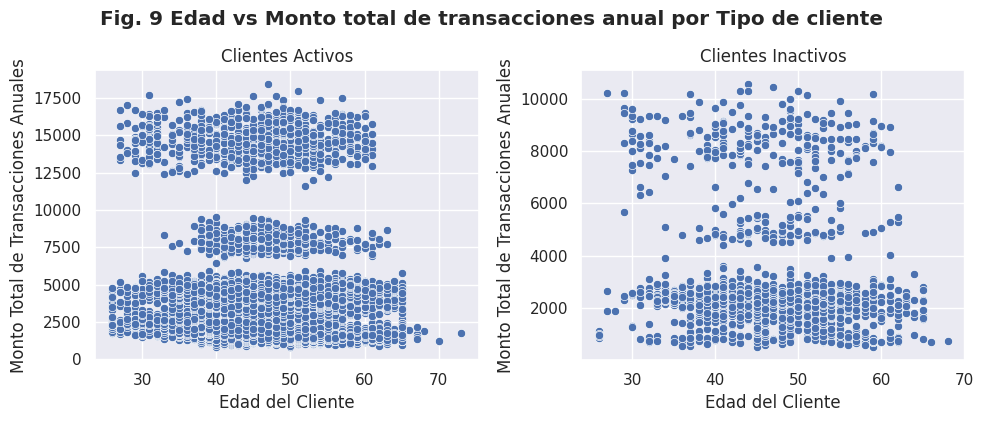

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrando clientes activos e inactivos
df_active_customers = df_bank2[df_bank2['Attrition_Flag'] == 'Existing Customer']
df_inactive_customers = df_bank2[df_bank2['Attrition_Flag'] == 'Attrited Customer']

# Creando subpaneles
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Gráfico de dispersión para clientes activos
ax1 = sns.scatterplot(x='Customer_Age', y='Total_Trans_Amt', data=df_active_customers, ax=axes[0])
ax1.set_xlabel('Edad del Cliente')
ax1.set_ylabel('Monto Total de Transacciones Anuales')
ax1.set_title('Clientes Activos')

# Gráfico de dispersión para clientes inactivos
ax2 = sns.scatterplot(x='Customer_Age', y='Total_Trans_Amt', data=df_inactive_customers, ax=axes[1])
ax2.set_xlabel('Edad del Cliente')
ax2.set_ylabel('Monto Total de Transacciones Anuales')
ax2.set_title('Clientes Inactivos')

# Ajustando espacio entre los subpaneles
plt.tight_layout()

plt.suptitle('Fig. 9 Edad vs Monto total de transacciones anual por Tipo de cliente', y=1.05, fontweight='bold')

# Mostrando los gráficos
plt.show()


Gráfico de puntos para identificar la distribución de edad, monto total de transacciones anuales, dependientes y estado del cliente.

Variables: Attrition_Flag, Customer_Age, Dependent_count, Total_Trans_Amt

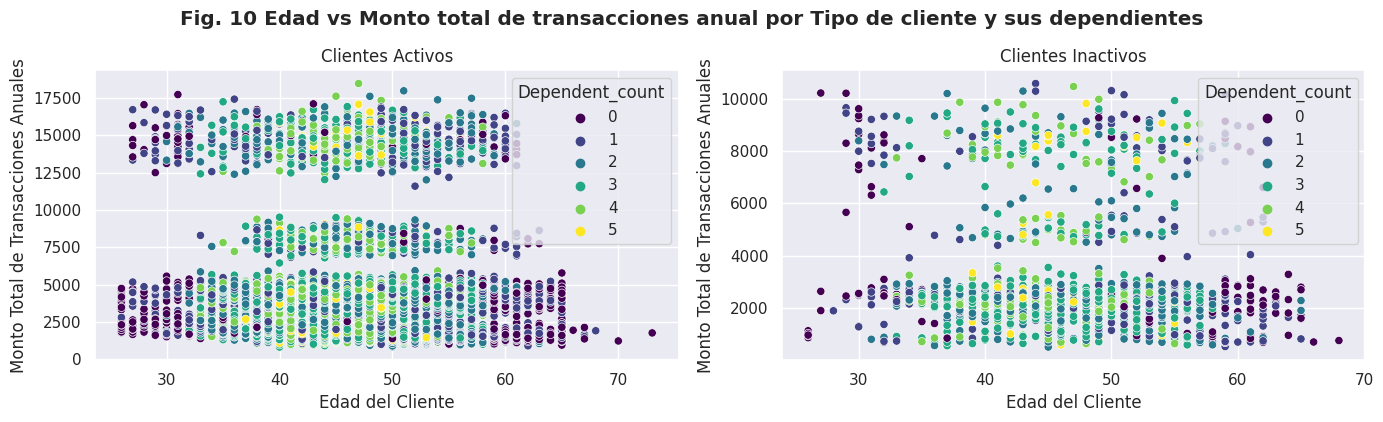

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrando clientes activos e inactivos
df_active_customers = df_bank2[df_bank2['Attrition_Flag'] == 'Existing Customer']
df_inactive_customers = df_bank2[df_bank2['Attrition_Flag'] == 'Attrited Customer']

# Creando subpaneles
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Gráfico de dispersión para clientes activos
ax1 = sns.scatterplot(x='Customer_Age', y='Total_Trans_Amt', hue='Dependent_count', data=df_active_customers, ax=axes[0], palette='viridis')
ax1.set_xlabel('Edad del Cliente')
ax1.set_ylabel('Monto Total de Transacciones Anuales')
ax1.set_title('Clientes Activos')

# Gráfico de dispersión para clientes inactivos
ax2 = sns.scatterplot(x='Customer_Age', y='Total_Trans_Amt', hue='Dependent_count', data=df_inactive_customers, ax=axes[1], palette='viridis')
ax2.set_xlabel('Edad del Cliente')
ax2.set_ylabel('Monto Total de Transacciones Anuales')
ax2.set_title('Clientes Inactivos')

# Ajustando espacio entre los subpaneles
plt.tight_layout()

plt.suptitle('Fig. 10 Edad vs Monto total de transacciones anual por Tipo de cliente y sus dependientes', y=1.05, fontweight='bold')

# Mostrando los gráficos
plt.show()


Gráfico de puntos para identificar la distribución de cantidad de compras, monto total de transacciones anuales, nivel de educación y estado del cliente.

Variables: Attrition_Flag, Total_Trans_Ct, Total_Trans_Amt, Education_Level

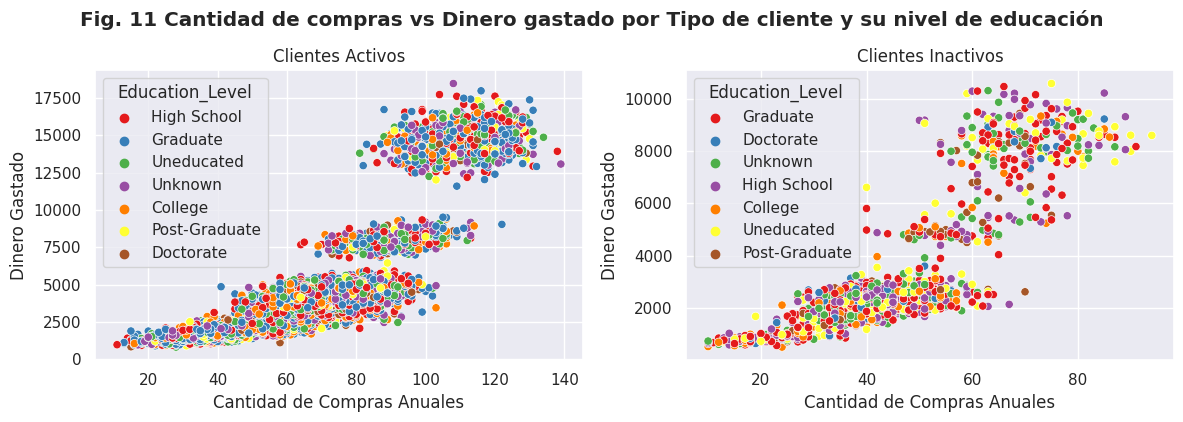

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrando clientes activos e inactivos
df_active_customers = df_bank2[df_bank2['Attrition_Flag'] == 'Existing Customer']
df_inactive_customers = df_bank2[df_bank2['Attrition_Flag'] == 'Attrited Customer']

# Creando subpaneles
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de dispersión para clientes activos
sns.scatterplot(x='Total_Trans_Ct', y='Total_Trans_Amt', hue='Education_Level', data=df_active_customers, palette='Set1', ax=axes[0])
axes[0].set_xlabel('Cantidad de Compras Anuales')
axes[0].set_ylabel('Dinero Gastado')
axes[0].set_title('Clientes Activos')

# Gráfico de dispersión para clientes inactivos
sns.scatterplot(x='Total_Trans_Ct', y='Total_Trans_Amt', hue='Education_Level', data=df_inactive_customers, palette='Set1', ax=axes[1])
axes[1].set_xlabel('Cantidad de Compras Anuales')
axes[1].set_ylabel('Dinero Gastado')
axes[1].set_title('Clientes Inactivos')

# Ajustando espacio entre los subpaneles
plt.tight_layout()

plt.suptitle('Fig. 11 Cantidad de compras vs Dinero gastado por Tipo de cliente y su nivel de educación', y=1.05, fontweight='bold')

# Mostrando los gráficos
plt.show()


Gráfico de puntos para identificar la distribución de cantidad de compras, monto total de transacciones anuales, dependientes y estado del cliente.

Variables: Attrition_Flag, Total_Trans_Ct, Total_Trans_Amt,Dependent_count

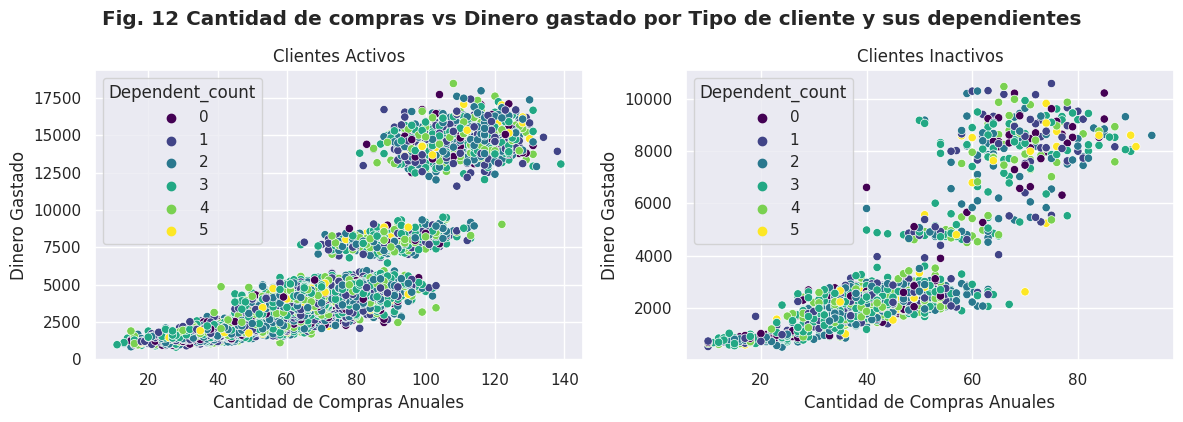

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrando clientes activos e inactivos
df_active_customers = df_bank2[df_bank2['Attrition_Flag'] == 'Existing Customer']
df_inactive_customers = df_bank2[df_bank2['Attrition_Flag'] == 'Attrited Customer']

# Creando subpaneles
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico de dispersión para clientes activos
sns.scatterplot(x='Total_Trans_Ct', y='Total_Trans_Amt', hue='Dependent_count', data=df_active_customers, palette='viridis', ax=axes[0])
axes[0].set_xlabel('Cantidad de Compras Anuales')
axes[0].set_ylabel('Dinero Gastado')
axes[0].set_title('Clientes Activos')

# Gráfico de dispersión para clientes inactivos
sns.scatterplot(x='Total_Trans_Ct', y='Total_Trans_Amt', hue='Dependent_count', data=df_inactive_customers, palette='viridis', ax=axes[1])
axes[1].set_xlabel('Cantidad de Compras Anuales')
axes[1].set_ylabel('Dinero Gastado')
axes[1].set_title('Clientes Inactivos')

# Ajustando espacio entre los subpaneles
plt.tight_layout()

plt.suptitle('Fig. 12 Cantidad de compras vs Dinero gastado por Tipo de cliente y sus dependientes', y=1.05, fontweight='bold')

# Mostrando los gráficos
plt.show()


Gráfico de cajas para la distribución por estado del cliente, edad y categoría de ingresos.

Variables: Attrition_Flag, Customer_Age, Income_Category

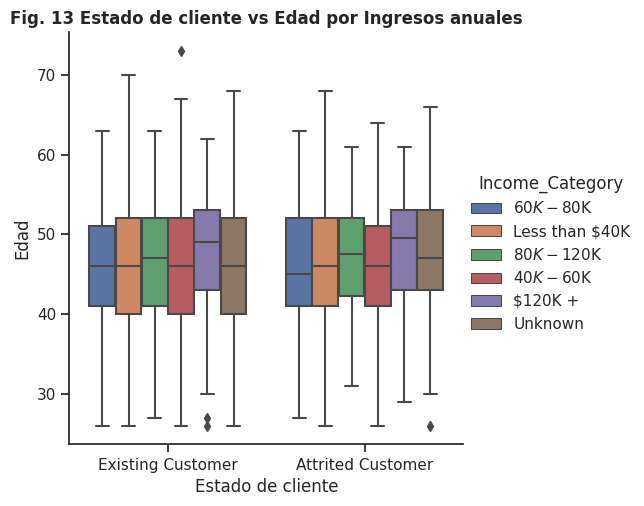

In [ ]:
# Creando el diagrama de cajas
with sns.axes_style(style='ticks'):
  ax = sns.catplot(data=df_bank2, x="Attrition_Flag", y="Customer_Age", hue="Income_Category", kind="box")

# Agregando los labels y el título
plt.xlabel('Estado de cliente')
plt.ylabel('Edad')

# Agregando título en negrita
plt.title('Fig. 13 Estado de cliente vs Edad por Ingresos anuales', weight='bold')
plt.show()

Gráfico de barras agrupadas para comparar el nivel de educación por estado del cliente.

Variables: Education_Level, Attrition_Flag

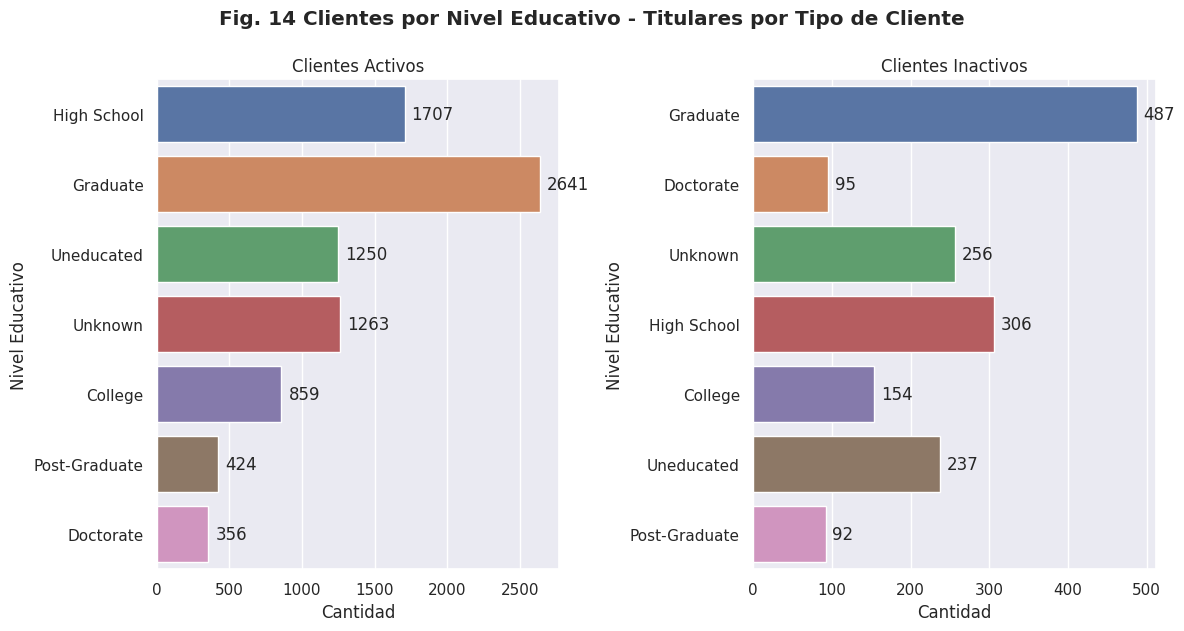

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Filtrando los datos por estado del cliente
df_existing_customers = df_bank2[df_bank2['Attrition_Flag'] == 'Existing Customer']
df_attrited_customers = df_bank2[df_bank2['Attrition_Flag'] == 'Attrited Customer']

# Creando los subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para clientes existentes
ax1 = sns.countplot(y=df_existing_customers['Education_Level'], ax=axes[0])
ax1.set_xlabel('Cantidad')
ax1.set_ylabel('Nivel Educativo')
ax1.set_title('Clientes Activos')

# Mostrando los valores encima de cada barra
for p in ax1.patches:
    width = p.get_width()
    ax1.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2), xytext=(5, 0), textcoords='offset points', ha='left', va='center')

# Gráfico para clientes inactivos
ax2 = sns.countplot(y=df_attrited_customers['Education_Level'], ax=axes[1])
ax2.set_xlabel('Cantidad')
ax2.set_ylabel('Nivel Educativo')
ax2.set_title('Clientes Inactivos')

# Mostrando los valores encima de cada barra
for p in ax2.patches:
    width = p.get_width()
    ax2.annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2), xytext=(5, 0), textcoords='offset points', ha='left', va='center')

# Ajustando espacio entre los subplots
plt.tight_layout()

# Título general de la gráfica
plt.suptitle('Fig. 14 Clientes por Nivel Educativo - Titulares por Tipo de Cliente', y=1.05, fontweight='bold')

# Mostrar la gráfica
plt.show()


Gráfico de columnas agrupadas para comparar el ingreso anual por estado del cliente.

Variables: Income_Category, Attrition_Flag

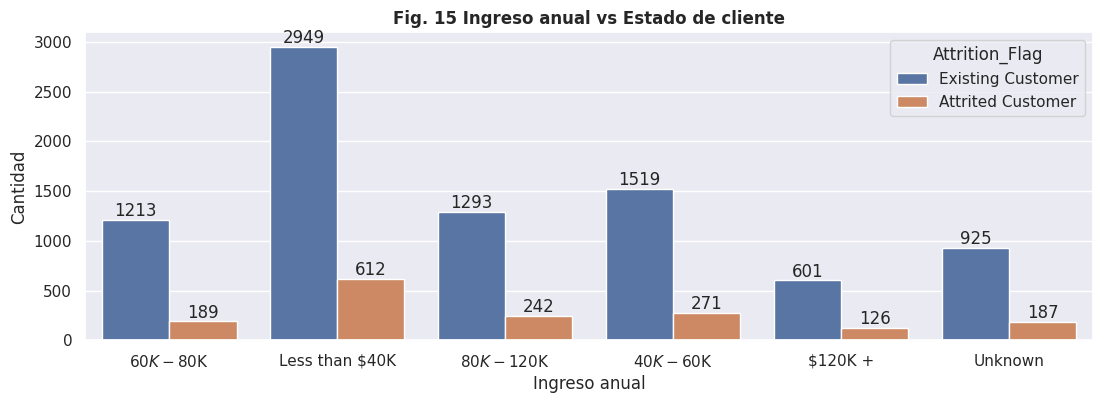

In [ ]:
# Creando el diagrama de columnas múltiples
ax=sns.countplot(x=df_bank2['Income_Category'],hue='Attrition_Flag',data=df_bank2)
for i in ax.containers:
    ax.bar_label(i,)
sns.set(rc={'figure.figsize':(5,5)})

# Agregando los labels y el título
plt.xlabel('Ingreso anual')
plt.ylabel('Cantidad')

# Agregando título en negrita
plt.title('Fig. 15 Ingreso anual vs Estado de cliente', weight='bold')

plt.show()

Gráfico de barras agrupadas para comparar el límite de cr´edito y el ingreso anual por estado del cliente.

Variables: Credit_Limit, Income_Category, Attrition_Flag

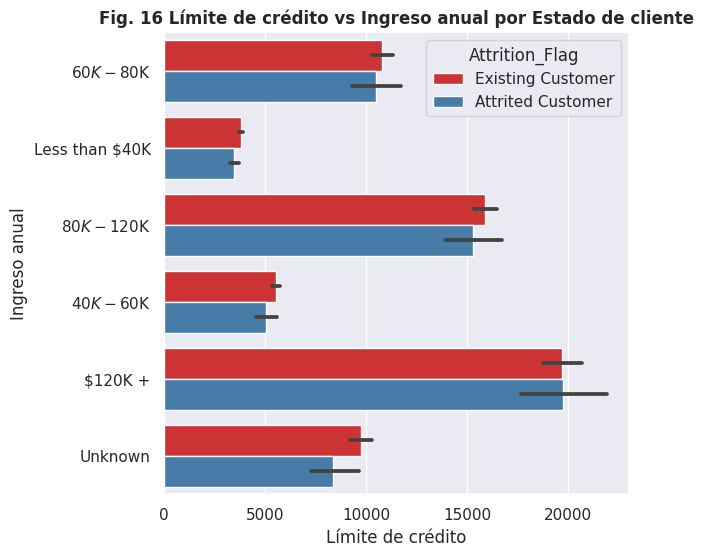

In [ ]:
# Creando el diagrama de barras múltiples
plt.figure(figsize=(6,6))
sns.barplot(x='Credit_Limit',y='Income_Category',hue='Attrition_Flag',data=df_bank2,palette='Set1')

# Agregando los labels y el título
plt.xlabel('Límite de crédito')
plt.ylabel('Ingreso anual')

# Agregando título en negrita
plt.title('Fig. 16 Límite de crédito vs Ingreso anual por Estado de cliente', weight='bold')
plt.show()

Gráfico de histograma para identificar la distribución del ratio medio de uso de la tarjeta por estado del cliente.

Variables: Attrition_Flag, Avg_Utilization_Ratio.

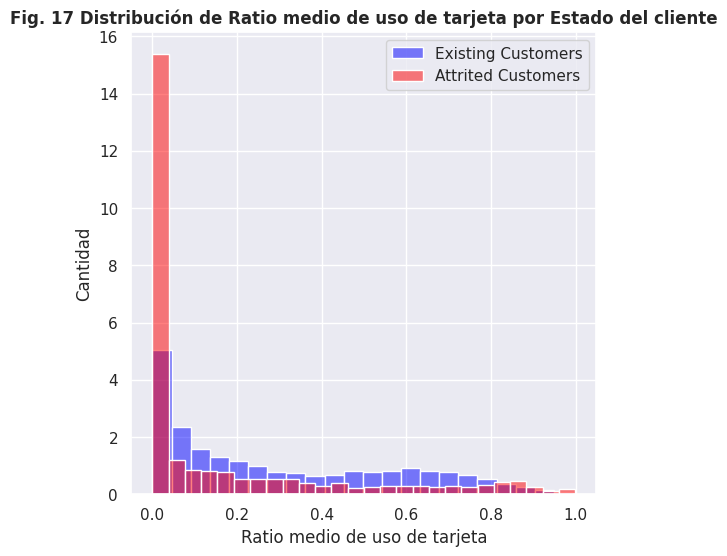

In [ ]:
# Filtrando los datos por existing customers y attrited customers
existing_customers = df_bank2[df_bank2['Attrition_Flag'] == 'Existing Customer']
attrited_customers = df_bank2[df_bank2['Attrition_Flag'] == 'Attrited Customer']

# Creando el histograma para comparar las distribuciones
plt.figure(figsize=(6,6))
sns.histplot(existing_customers['Avg_Utilization_Ratio'], label='Existing Customers', color='blue', alpha=0.5,stat='density')
sns.histplot(attrited_customers['Avg_Utilization_Ratio'], label='Attrited Customers', color='red', alpha=0.5,stat='density')

# Seteando los label y el título
plt.xlabel('Ratio medio de uso de tarjeta')
plt.ylabel('Cantidad')
plt.title('Fig. 17 Distribución de Ratio medio de uso de tarjeta por Estado del cliente',weight='bold')

# Agregando la leyenda
plt.legend()

# Mostrando el plot
plt.show()